In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.formula.api import logit
from statsmodels.stats.anova import anova_lm
from patsy import dmatrices
import matplotlib.pyplot as plt
%matplotlib inline

/home/vasia/.local/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

## Question1

In [3]:
sildta = pd.read_csv('data/Reveal_EEO1_for_2016.csv')
sildta = sildta[(sildta.job_category.str.contains('Totals')==False)]
sildta = sildta[(sildta.job_category.str.contains('Previous_totals')==False)]
sildta['count']= sildta['count'].astype('int64')
sildta.head(3)

,company,year,race,gender,job_category,count
0,23andMe,2016,Latino,male,Executive/Senior officials & Mgrs,0
1,23andMe,2016,Latino,male,First/Mid officials & Mgrs,1
2,23andMe,2016,Latino,male,Professionals,7


In [4]:
male_sildta = sildta[sildta['gender']=='male']
male_sildta['jobs']= male_sildta.job_category.str.contains('Senior')
m_model = ols('count~jobs', data=male_sildta).fit()
m_table = anova_lm(m_model)
male_sildta
print(m_model.summary())
m_table



                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     3.778
Date:                Fri, 12 Jan 2018   Prob (F-statistic):             0.0521
Time:                        21:44:21   Log-Likelihood:                -12763.
No. Observations:                1540   AIC:                         2.553e+04
Df Residuals:                    1538   BIC:                         2.554e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      176.6768     25.852      6.834   

/home/vasia/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/vasia/.local/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/vasia/.local/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/vasia/.local/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df,sum_sq,mean_sq,F,PR(>F)
jobs,1.0,3.499432e+06,3.499432e+06,3.777776,0.05212
Residual,1538.0,1.424682e+09,9.263209e+05,NaN,NaN


In [5]:
#double check with ttest
male_seniors = male_sildta[male_sildta.job_category.str.contains('Senior')]['count']
male_non_seniors = male_sildta[male_sildta.job_category.str.contains('Senior')==False]['count']
print(sm.stats.ttest_ind(male_non_seniors, male_seniors))

(1.943650086840004, 0.052119854647454264, 1538.0)


In [6]:
white_sildta = sildta[sildta['race']=='White']
white_sildta['jobs']= white_sildta.job_category.str.contains('Senior')
w_model = ols('count~jobs', data=white_sildta).fit()
w_table = anova_lm(w_model)
print(w_model.summary())
w_table

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     3.204
Date:                Fri, 12 Jan 2018   Prob (F-statistic):             0.0742
Time:                        21:44:21   Log-Likelihood:                -3871.0
No. Observations:                 440   AIC:                             7746.
Df Residuals:                     438   BIC:                             7754.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      516.1414     80.666      6.399   

/home/vasia/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/vasia/.local/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/vasia/.local/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/vasia/.local/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df,sum_sq,mean_sq,F,PR(>F)
jobs,1.0,8.255803e+06,8.255803e+06,3.203956,0.074151
Residual,438.0,1.128618e+09,2.576752e+06,NaN,NaN


In [7]:
#double check with ttest
white_seniors = white_sildta[white_sildta.job_category.str.contains('Senior')]['count']
white_non_seniors = white_sildta[white_sildta.job_category.str.contains('Senior')==False]['count']
print(sm.stats.ttest_ind(white_non_seniors, white_seniors))

(1.789959914380308, 0.07415099611184042, 438.0)


# Question 2

In [8]:
from datetime import datetime

In [9]:
wow_df = pd.read_csv('data/wowcointotal.csv')
wow_df.head(2)

,Region,Date,Price,Time left on Auction
0,US,4/7/2015 17:12,30000,Short
1,US,4/7/2015 17:42,30000,Short


In [10]:
wow_df = wow_df.set_index(wow_df['Date'])

In [11]:
wow_df.index = pd.to_datetime(wow_df.index).to_period('M')
wow_df = wow_df.drop(['Date'], axis=1)
wow_df=wow_df.reset_index()
wow_df = wow_df.rename(columns={'Date':'YearMonth'})

In [12]:
wow_model = ols('Price~YearMonth', data=wow_df).fit()
wow_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 2.968e+05
Date:                Fri, 12 Jan 2018   Prob (F-statistic):               0.00
Time:                        21:44:49   Log-Likelihood:            -1.1207e+06
No. Observations:              115274   AIC:                         2.242e+06
Df Residuals:                  115244   BIC:                         2.242e+06
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                            2.278e+04     88.390    257.717      0.000    2.26e+04     2.3e+04
YearMonth[T.Period('2015-05', 'M')]   -36.2862    111.312     -0.326      0.744    -254.456     181.884
YearMonth[T.Period('2015-06', 'M')]  1667.2582    109.854     15.177      0.000    1451.946    1882.570
YearMonth[T.Period('2015-07', 'M')]  2223.9864    107.317     20.724      0.000    2013.647    2434.326
YearMonth[T.Period('2015-08', 'M')]  4103.9760    107.317     38.242      0.000    3893.637    4314.315
YearMonth[T.Period('2015-09', 'M')]  6107.2319    108.907     56.077      0.000    5893.775    6320.689
YearMonth[T.Period('2015-10', 'M')]  9547.5388    107.812     88.557      0.000    9336.229    9758.848
YearMonth[T.Period('2015-11', 'M')]  1.408e+04    107.853    130.568      0.000    1.39e+04    1.43e+04
YearMonth[T.Period('2015-12', 'M')]  1.344e+04    107.427    125.079      0.000    1.32e+04    1.36e+04
YearMonth[T.Period('2016-01', 'M')]  1.285e+04    107.204    119.909      0.000    1.26e+04    1.31e+04
YearMonth[T.Period('2016-02', 'M')]  1.461e+04    108.563    134.618      0.000    1.44e+04    1.48e+04
YearMonth[T.Period('2016-03', 'M')]  1.645e+04    109.798    149.834      0.000    1.62e+04    1.67e+04
YearMonth[T.Period('2016-04', 'M')]  1.847e+04    107.974    171.071      0.000    1.83e+04    1.87e+04
YearMonth[T.Period('2016-05', 'M')]  2.341e+04    107.636    217.484      0.000    2.32e+04    2.36e+04
YearMonth[T.Period('2016-06', 'M')]  2.307e+04    107.882    213.853      0.000    2.29e+04    2.33e+04
YearMonth[T.Period('2016-07', 'M')]  1.847e+04    108.187    170.715      0.000    1.83e+04    1.87e+04
YearMonth[T.Period('2016-08', 'M')]  1.503e+04    118.687    126.594      0.000    1.48e+04    1.53e+04
YearMonth[T.Period('2016-09', 'M')]  1.229e+04    108.050    113.712      0.000    1.21e+04    1.25e+04
YearMonth[T.Period('2016-10', 'M')]  1.512e+04    107.372    140.830      0.000    1.49e+04    1.53e+04
YearMonth[T.Period('2016-11', 'M')]  2.684e+04    110.319    243.288      0.000    2.66e+04    2.71e+04
YearMonth[T.Period('2016-12', 'M')]  3.469e+04    110.575    313.691      0.000    3.45e+04    3.49e+04
YearMonth[T.Period('2017-01', 'M')]  3.713e+04    107.932    344.047      0.000    3.69e+04    3.73e+04
YearMonth[T.Period('2017-02', 'M')]  5.946e+04    109.146    544.756      0.000    5.92e+04    5.97e+04
YearMonth[T.Period('2017-03', 'M')]   7.07e+04    108.080    654.118      0.000    7.05e+04    7.09e+04
YearMonth[T.Period('2017-04', 'M')]  7.619e+04    108.101    704.831      0.000     7.6e+04    7.64e+04
YearMonth[T.Period('2017-05', 'M')]  9.017e+04    107.644    837.685      0.000       9e+04    9.04e+04
YearMonth[T.Period('2017-06', 'M')]  1.067e+05    109.360    975.86

In order to see the spike in prices to determine the inflation point in the economy we can plot the price in relation to time.

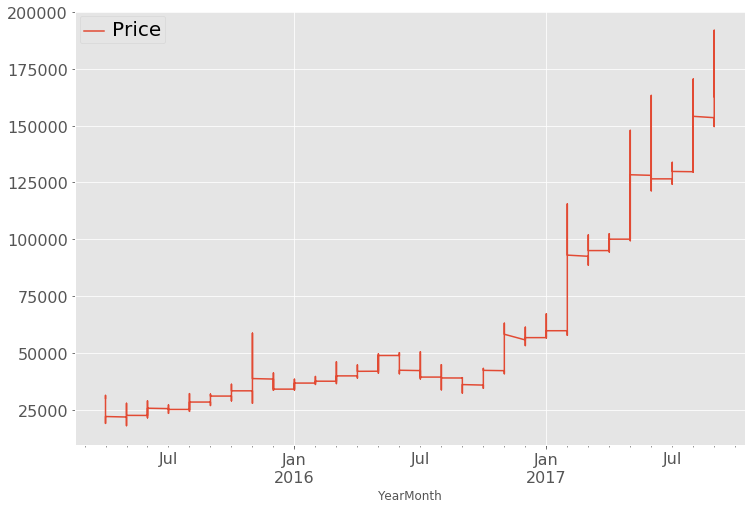

In [13]:
inflation_df = wow_df[["Price", 'YearMonth']]
inflation_df = wow_df.set_index('YearMonth')
plt.style.use('ggplot')
x = np.linspace(0, 2, 100)
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
inflation_df.plot(ax=ax, fontsize=16)
legend = ax.get_legend()
legend.prop.set_size(20)

As we can see the point where the price has the most steep increase is on February 2017.

In [14]:
wow_df_before = wow_df[wow_df.YearMonth<pd.Period('2017-02')]
wow_before_model =  ols('Price~YearMonth', data=wow_df_before).fit()
wow_before_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                 1.226e+05
Date:                Fri, 12 Jan 2018   Prob (F-statistic):               0.00
Time:                        21:44:58   Log-Likelihood:            -7.8069e+05
No. Observations:               87522   AIC:                         1.561e+06
Df Residuals:                   87500   BIC:                         1.562e+06
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                            2.278e+04     39.621    574.933      0.000    2.27e+04    2.29e+04
YearMonth[T.Period('2015-05', 'M')]   -36.2862     49.896     -0.727      0.467    -134.083      61.510
YearMonth[T.Period('2015-06', 'M')]  1667.2582     49.243     33.858      0.000    1570.743    1763.774
YearMonth[T.Period('2015-07', 'M')]  2223.9864     48.106     46.231      0.000    2129.700    2318.273
YearMonth[T.Period('2015-08', 'M')]  4103.9760     48.106     85.312      0.000    4009.690    4198.262
YearMonth[T.Period('2015-09', 'M')]  6107.2319     48.818    125.101      0.000    6011.548    6202.916
YearMonth[T.Period('2015-10', 'M')]  9547.5388     48.327    197.560      0.000    9452.818    9642.260
YearMonth[T.Period('2015-11', 'M')]  1.408e+04     48.346    291.280      0.000     1.4e+04    1.42e+04
YearMonth[T.Period('2015-12', 'M')]  1.344e+04     48.155    279.034      0.000    1.33e+04    1.35e+04
YearMonth[T.Period('2016-01', 'M')]  1.285e+04     48.055    267.501      0.000    1.28e+04    1.29e+04
YearMonth[T.Period('2016-02', 'M')]  1.461e+04     48.664    300.315      0.000    1.45e+04    1.47e+04
YearMonth[T.Period('2016-03', 'M')]  1.645e+04     49.218    334.259      0.000    1.64e+04    1.65e+04
YearMonth[T.Period('2016-04', 'M')]  1.847e+04     48.400    381.636      0.000    1.84e+04    1.86e+04
YearMonth[T.Period('2016-05', 'M')]  2.341e+04     48.248    485.177      0.000    2.33e+04    2.35e+04
YearMonth[T.Period('2016-06', 'M')]  2.307e+04     48.359    477.076      0.000     2.3e+04    2.32e+04
YearMonth[T.Period('2016-07', 'M')]  1.847e+04     48.495    380.841      0.000    1.84e+04    1.86e+04
YearMonth[T.Period('2016-08', 'M')]  1.503e+04     53.202    282.415      0.000    1.49e+04    1.51e+04
YearMonth[T.Period('2016-09', 'M')]  1.229e+04     48.434    253.675      0.000    1.22e+04    1.24e+04
YearMonth[T.Period('2016-10', 'M')]  1.512e+04     48.130    314.173      0.000     1.5e+04    1.52e+04
YearMonth[T.Period('2016-11', 'M')]  2.684e+04     49.451    542.743      0.000    2.67e+04    2.69e+04
YearMonth[T.Period('2016-12', 'M')]  3.469e+04     49.566    699.802      0.000    3.46e+04    3.48e+04
YearMonth[T.Period('2017-01', 'M')]  3.713e+04     48.381    767.521      0.000     3.7e+04    3.72e+04
==============================================================================
Omnibus:                    27068.401   Durbin-Watson:                   0.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           533122.438
Skew:                           1.000   Prob(JB):                         0.00
Kurtosis:                      14.924   Cond. No.                         31.4
==============================================================================

Warnings

In [15]:
wow_df_after = wow_df[wow_df.YearMonth>=pd.Period('2017-02')]
wow_after_model =  ols('Price~YearMonth', data=wow_df_after).fit()
wow_after_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                 3.316e+04
Date:                Fri, 12 Jan 2018   Prob (F-statistic):               0.00
Time:                        21:45:00   Log-Likelihood:            -2.8728e+05
No. Observations:               27752   AIC:                         5.746e+05
Df Residuals:                   27744   BIC:                         5.746e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                            8.224e+04    120.134    684.547      0.000     8.2e+04    8.25e+04
YearMonth[T.Period('2017-03', 'M')]  1.124e+04    167.480     67.108      0.000    1.09e+04    1.16e+04
YearMonth[T.Period('2017-04', 'M')]  1.674e+04    167.528     99.896      0.000    1.64e+04    1.71e+04
YearMonth[T.Period('2017-05', 'M')]  3.071e+04    166.489    184.481      0.000    3.04e+04     3.1e+04
YearMonth[T.Period('2017-06', 'M')]  4.726e+04    170.381    277.398      0.000    4.69e+04    4.76e+04
YearMonth[T.Period('2017-07', 'M')]    4.6e+04    173.547    265.076      0.000    4.57e+04    4.63e+04
YearMonth[T.Period('2017-08', 'M')]  6.556e+04    202.986    322.996      0.000    6.52e+04     6.6e+04
YearMonth[T.Period('2017-09', 'M')]  7.565e+04    242.393    312.111      0.000    7.52e+04    7.61e+04
==============================================================================
Omnibus:                     2002.763   Durbin-Watson:                   0.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9576.507
Skew:                          -0.172   Prob(JB):                         0.00
Kurtosis:                       5.857   Cond. No.                         8.53
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Question 3

In [16]:
credit_df = pd.read_csv('data/creditcard.csv')

In [17]:
formula= 'Class~V1+V2+V3+V4+V5+V6+V7+V8+V9+V10+V11+V12+V13+V14+V15+V16+V17+V18+V19+V20+V21+V22+V23+V24+V25+V26+V27+V28+Amount'

In [18]:
credit_labels = credit_df['Class']

In [19]:
credit_model = logit(formula=formula, data=credit_df).fit()
credit_model.summary()

Optimization terminated successfully.
         Current function value: 0.003919
         Iterations 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Class   No. Observations:               284807
Model:                          Logit   Df Residuals:                   284777
Method:                           MLE   Df Model:                           29
Date:                Fri, 12 Jan 2018   Pseudo R-squ.:                  0.6918
Time:                        21:45:08   Log-Likelihood:                -1116.1
converged:                       True   LL-Null:                       -3621.2
                                        LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.7304      0.151    -57.654      0.000      -9.027      -8.434
V1             0.0837      0.042      2.016      0.044       0.002       0.165
V2             0.0130      0.058      0.226      0.822      -0.100       0.126
V3             0.0384      0.045      0.845      0.398      -0.051       0.128
V4             0.7059      0.074      9.578      0.000       0.561       0.850
V5             0.1020      0.065      1.559      0.119      -0.026       0.230
V6            -0.1229      0.076     -1.621      0.105      -0.271       0.026
V7            -0.1107      0.066     -1.674      0.094      -0.240       0.019
V8            -0.1683      0.031     -5.511      0.000      -0.228      -0.108
V9            -0.2609      0.110     -2.375      0.018      -0.476      -0.046
V10           -0.8188      0.097     -8.439      0.000      -1.009      -0.629
V11           -0.0123      0.076     -0.162      0.871      -0.161       0.137
V12            0.0693      0.086      0.805      0.421      -0.099       0.238
V13           -0.3200      0.081     -3.937      0.000      -0.479      -0.161
V14           -0.5451      0.062     -8.843      0.000      -0.666      -0.424
V15           -0.0853      0.084     -1.016      0.310      -0.250       0.079
V16           -0.1936      0.125     -1.551      0.121      -0.438       0.051
V17            0.0024      0.069      0.035      0.972      -0.132       0.137
V18           -0.0373      0.128     -0.292      0.770      -0.287       0.213
V19            0.0764      0.096      0.797      0.425      -0.111       0.264
V20           -0.4473      0.082     -5.488      0.000      -0.607      -0.288
V21            0.3675      0.058      6.334      0.000       0.254       0.481
V22            0.5787      0.128      4.514      0.000       0.327       0.830
V23           -0.0901      0.057     -1.568      0.117      -0.203       0.023
V24            0.1384      0.149      0.928      0.353      -0.154       0.431
V25           -0.0449      0.129     -0.349      0.727      -0.297       0.207
V26           -0.0034      0.189     -0.018      0.986      -0.374       0.368
V27           -0.8052      0.123     -6.568      0.000      -1.045      -0.565
V28           -0.2943      0.089     -3.295      0.001      -0.469      -0.119
Amount         0.0009      0.000      2.458      0.014       0.000       0.002
==============================================================================

Possibly complete quasi-separation: A fraction 0.31 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [20]:
y_pred = pd.DataFrame(np.exp(credit_model.fittedvalues), columns=['fitted_values'])
y_pred['label']= np.where(y_pred['fitted_values']>0.5, 1, 0)
del(y_pred['fitted_values'])

In [21]:
print('accuracy score: ' , accuracy_score(credit_df['Class'], y_pred['label']))

accuracy score:  0.999227547075739


In [22]:
print('Class Inbalance: ')
credit_df.Class.value_counts()

Class Inbalance: 


0    284315
1       492
Name: Class, dtype: int64

In [23]:
y_pred = y_pred.as_matrix()
credit_labels =credit_labels.as_matrix()

In [85]:
def precision_recall(true_labels, predicted):
# calculate true positives, false positives, true negatives, false negatives
    tr_pos=0
    f_neg=0
    tr_neg=0
    f_pos=0

    for i in range(len(true_labels)):
        if (true_labels[i]==1 and predicted[i]==1):
            tr_pos += 1
        elif (true_labels[i]==1 and predicted[i]==0):
            f_neg += 1
        elif (true_labels[i]==0 and predicted[i]==0):
            tr_neg += 1
        elif (true_labels[i]==0 and predicted[i]==1):
            f_pos += 1
    print('Precision score for positive class(fraud): {0} '.format( tr_pos/(tr_pos+f_pos)))
    print('Precision score for negative class(non-fraud): {0} '.format( tr_neg/(tr_neg+f_neg)))
    print('Recall score for positive class(fraud): {0}'.format(tr_pos/(tr_pos+f_neg)))
    print('Recall score for negative class(non-fraud): {0}'.format(tr_neg/(tr_neg+f_pos)))

In [86]:
precision_recall(credit_labels, y_pred)

Precision score for positive class(fraud): 0.8417085427135679 
Precision score for negative class(non-fraud): 0.9994479780878945 
Recall score for positive class(fraud): 0.6808943089430894
Recall score for negative class(non-fraud): 0.9997784147864165


In [72]:
credit_fraud = len(credit_df[credit_df.Class == 1])
credit_non_fraud = len(credit_df[credit_df.Class==0])
print('Frauds vs Non-Frauds : ', credit_fraud, '/', credit_non_fraud)

Frauds vs Non-Frauds :  492 / 284315


In [73]:
fraud_indices = list(credit_df[credit_df.Class == 1].index)
non_fraud_indices = list(credit_df[credit_df.Class==0].index)

In [74]:
# randomly choose a sample of non fraud indices equal to the fraud indices to balance the set
balance_indices = np.random.choice(non_fraud_indices, credit_fraud, replace = False)
balance_indices = np.array(balance_indices)

In [75]:
fraud_indices = np.array(fraud_indices)
balanced_set = np.concatenate([fraud_indices, balance_indices])
new_credit_df = credit_df.iloc[balanced_set,:]
new_credit_df=new_credit_df.sample(frac=1)
new_credit_df.Class.value_counts()

In [79]:
new_credit_labels = new_credit_df['Class']

In [80]:
new_credit_model = logit(formula=formula, data=new_credit_df).fit()
new_credit_model.summary()

         Current function value: 0.107914
         Iterations: 35


/home/vasia/.local/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Class   No. Observations:                  984
Model:                          Logit   Df Residuals:                      954
Method:                           MLE   Df Model:                           29
Date:                Fri, 12 Jan 2018   Pseudo R-squ.:                  0.8443
Time:                        22:43:10   Log-Likelihood:                -106.19
converged:                      False   LL-Null:                       -682.06
                                        LLR p-value:                6.522e-224
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -35.6102   6303.407     -0.006      0.995   -1.24e+04    1.23e+04
V1            -5.7838   1368.484     -0.004      0.997   -2687.964    2676.396
V2            69.2187   9285.577      0.007      0.994   -1.81e+04    1.83e+04
V3           -52.6988   3592.307     -0.015      0.988   -7093.492    6988.094
V4            37.0053   2930.329      0.013      0.990   -5706.334    5780.345
V5           -19.4108    324.768     -0.060      0.952    -655.945     617.124
V6           -33.0693   4222.903     -0.008      0.994   -8309.808    8243.669
V7          -127.4272   1.45e+04     -0.009      0.993   -2.86e+04    2.84e+04
V8            23.6534   2468.022      0.010      0.992   -4813.581    4860.888
V9           -46.8493   4437.718     -0.011      0.992   -8744.617    8650.918
V10         -107.9290   1.02e+04     -0.011      0.992   -2.01e+04    1.99e+04
V11           84.7724   8662.133      0.010      0.992   -1.69e+04    1.71e+04
V12         -152.2586   1.56e+04     -0.010      0.992   -3.06e+04    3.03e+04
V13           -1.9181    410.268     -0.005      0.996    -806.029     802.192
V14         -163.0981    1.7e+04     -0.010      0.992   -3.34e+04    3.31e+04
V15           -4.9456    606.558     -0.008      0.993   -1193.777    1183.886
V16         -144.8422    1.5e+04     -0.010      0.992   -2.95e+04    2.92e+04
V17         -257.1123   2.63e+04     -0.010      0.992   -5.18e+04    5.13e+04
V18          -97.0422      1e+04     -0.010      0.992   -1.98e+04    1.96e+04
V19           37.1182   4168.999      0.009      0.993   -8133.970    8208.206
V20          -10.4471   2824.101     -0.004      0.997   -5545.583    5524.689
V21           11.6320    674.770      0.017      0.986   -1310.892    1334.156
V22           12.3167   1846.881      0.007      0.995   -3607.503    3632.137
V23           32.5634   5580.517      0.006      0.995   -1.09e+04     1.1e+04
V24           -3.7228    531.794     -0.007      0.994   -1046.020    1038.575
V25           17.7436   2542.612      0.007      0.994   -4965.684    5001.171
V26            4.0974    640.431      0.006      0.995   -1251.124    1259.319
V27           21.7815   1994.934      0.011      0.991   -3888.218    3931.781
V28           48.1510   6771.612      0.007      0.994   -1.32e+04    1.33e+04
Amount         0.3886     64.499      0.006      0.995    -126.026     126.803
==============================================================================

Possibly complete quasi-separation: A fraction 0.51 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [81]:
new_y_pred = pd.DataFrame(np.exp(new_credit_model.fittedvalues), columns=['fitted_values'])
new_y_pred['label']= np.where(new_y_pred['fitted_values']>0.5, 1, 0)
del(new_y_pred['fitted_values'])

/home/vasia/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.


In [82]:
print('accuracy score: ' , accuracy_score(new_credit_df['Class'], new_y_pred['label']))

accuracy score:  0.9522357723577236


In [83]:
new_y_pred = new_y_pred.as_matrix()
new_credit_labels =new_credit_labels.as_matrix()

In [87]:
precision_recall(new_credit_labels, new_y_pred)

Precision score for positive class(fraud): 0.9476861167002012 
Precision score for negative class(non-fraud): 0.9568788501026694 
Recall score for positive class(fraud): 0.9573170731707317
Recall score for negative class(non-fraud): 0.9471544715447154
